In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# TODO: Read the csv into a dataframe.
df = pd.read_csv("train.csv")
df.head()

,review_id,title,year,user_review,user_suggestion
0,1,Spooky's Jump Scare Mansion,2016.0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1
1,2,Spooky's Jump Scare Mansion,2016.0,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.",1
2,3,Spooky's Jump Scare Mansion,2016.0,"A littly iffy on the controls, but once you know how to play, very easy to master. I've made it to floor 1000 before, but due to certain circumstances was unable to finish. Was not game related, don't worry, not a bug/glitch or antyhing.I highly recommend this for casual play, maybe with a friend or two watching. Hilarity ensues, especially once you hit floor 150. Have fun my fellow fleshlings!",1
3,4,Spooky's Jump Scare Mansion,2015.0,"Great game, fun and colorful and all that.A side note, though: When are we getting windowed mode? My computer hates fullscreen so.... yeah. The computer doesn't like to run this. Shame, because this is really enjoyable. But until then, I guess I'll settle for more Skyrim. Cheers!",1
4,5,Spooky's Jump Scare Mansion,2015.0,"Not many games have the cute tag right next to the horror tag on Steam.I first played this game in late 2014 and coming back to it for the first time since. This game is so good for it being free, take advantage and experience it. Try and get to room 1000 or as close as you can. The further you progress the darker the game becomes.",1


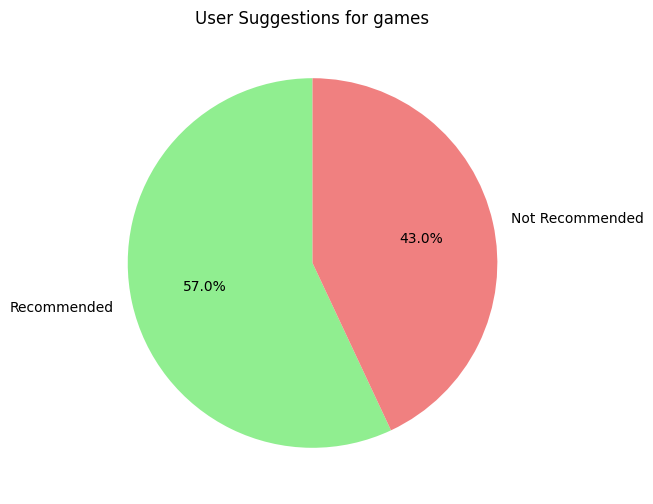

In [58]:



# Count the number of recommendations (1) and non-recommendations (0)
recommendation_counts = df['user_suggestion'].value_counts()

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(recommendation_counts, labels=['Recommended', 'Not Recommended'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('User Suggestions for games')
plt.show()


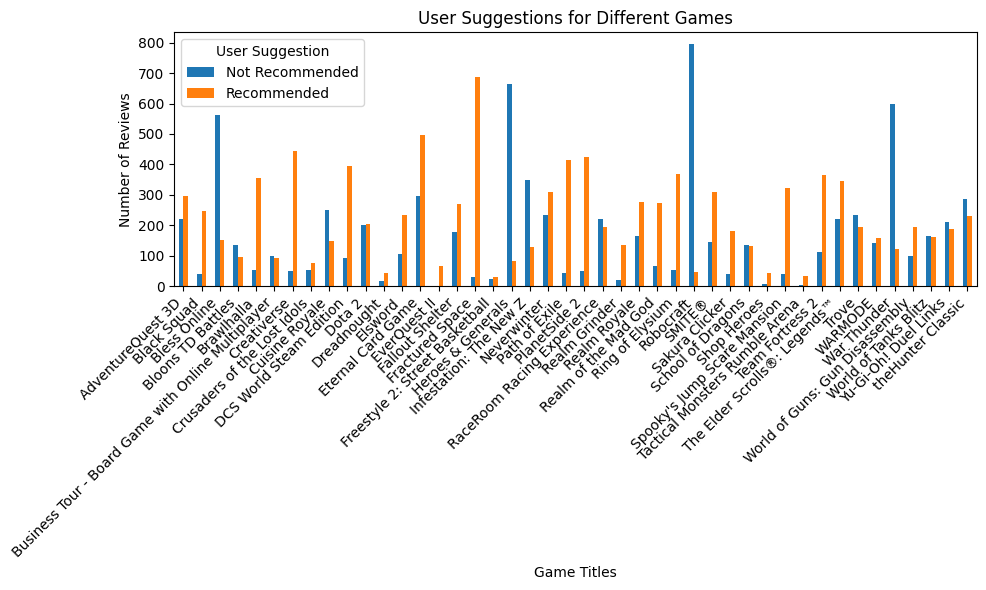

In [59]:


# Assuming df is your DataFrame containing the dataset
# Group the data by 'title' and count user suggestions for each game
game_suggestions = df.groupby('title')['user_suggestion'].value_counts().unstack().fillna(0)

# Plotting a grouped bar chart
game_suggestions.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.xlabel('Game Titles')
plt.ylabel('Number of Reviews')
plt.title('User Suggestions for Different Games')
plt.legend(title='User Suggestion', labels=['Not Recommended', 'Recommended'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


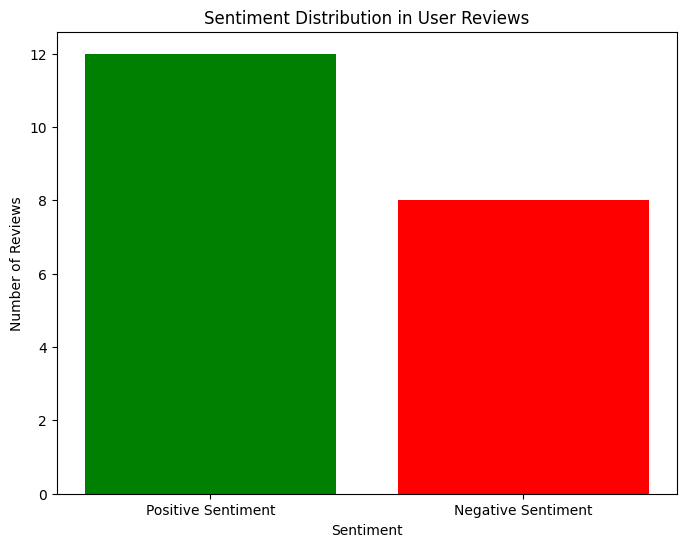

In [60]:
import matplotlib.pyplot as plt

# Sample data representing sentiment distribution from your model
sentiments = [1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1]

# Count the number of positive (1) and negative (0) sentiments
positive_sentiments = sum(sentiment == 1 for sentiment in sentiments)
negative_sentiments = sum(sentiment == 0 for sentiment in sentiments)

# Bar chart
labels = ['Positive Sentiment', 'Negative Sentiment']
values = [positive_sentiments, negative_sentiments]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['green', 'red'])
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution in User Reviews')
plt.show()


In [61]:
import nltk;

# download the stopwords from NLTK
nltk.download('stopwords')

import re                                  # library for regular expression operations
import string                              # for string operations

from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.tokenize import TweetTokenizer   # module for tokenizing strings

pd.set_option('display.max_colwidth', 1)
df = df[['user_review','user_suggestion']]
df.head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\golak\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,user_review,user_suggestion
0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1
1,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.",1
2,"A littly iffy on the controls, but once you know how to play, very easy to master. I've made it to floor 1000 before, but due to certain circumstances was unable to finish. Was not game related, don't worry, not a bug/glitch or antyhing.I highly recommend this for casual play, maybe with a friend or two watching. Hilarity ensues, especially once you hit floor 150. Have fun my fellow fleshlings!",1
3,"Great game, fun and colorful and all that.A side note, though: When are we getting windowed mode? My computer hates fullscreen so.... yeah. The computer doesn't like to run this. Shame, because this is really enjoyable. But until then, I guess I'll settle for more Skyrim. Cheers!",1
4,"Not many games have the cute tag right next to the horror tag on Steam.I first played this game in late 2014 and coming back to it for the first time since. This game is so good for it being free, take advantage and experience it. Try and get to room 1000 or as close as you can. The further you progress the darker the game becomes.",1


In [62]:
#library that contains punctuation
import string
string.punctuation


#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree

#storing the puntuation free text
df['clean_review']= df['user_review'].apply(lambda x:remove_punctuation(x))

df.head()




,user_review,user_suggestion,clean_review
0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,Im scared and hearing creepy voices So Ill pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean Hello 1990sWhat charactes there are that isnot trying to kill me were likable and a bit odd I did do a few noob things though such asOh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themOr hmm creepy music Ill turn around and see if I can see whats chasing meNever before in a game have I been this afraid of finding a locked door
1,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.",1,Best game more better than Sam Peppers YouTube account 1010What youll need to playA computerSome extra pantsProsScary as hellFunAdventureSpookyDid I forgot to mention that its scary as hellYoull get more pantsbriefs in your wardrobeTime consuming if youre boredConsBuying pantsbriefs You havent downloaded it yet
2,"A littly iffy on the controls, but once you know how to play, very easy to master. I've made it to floor 1000 before, but due to certain circumstances was unable to finish. Was not game related, don't worry, not a bug/glitch or antyhing.I highly recommend this for casual play, maybe with a friend or two watching. Hilarity ensues, especially once you hit floor 150. Have fun my fellow fleshlings!",1,A littly iffy on the controls but once you know how to play very easy to master Ive made it to floor 1000 before but due to certain circumstances was unable to finish Was not game related dont worry not a bugglitch or antyhingI highly recommend this for casual play maybe with a friend or two watching Hilarity ensues especially once you hit floor 150 Have fun my fellow fleshlings
3,"Great game, fun and colorful and all that.A side note, though: When are we getting windowed mode? My computer hates fullscreen so.... yeah. The computer doesn't like to run this. Shame, because this is really enjoyable. But until then, I guess I'll settle for more Skyrim. Cheers!",1,Great game fun and colorful and all thatA side note though When are we getting windowed mode My computer hates fullscreen so yeah The computer doesnt like to run this Shame because this is really enjoyable But until then I guess Ill settle for more Skyrim Cheers
4,"Not many games have the cute tag right next to the horror tag on Steam.I first played this game in late 2014 and coming back to it for the first time since. This game is so good for it being free, take advantage and experience it. Try and get to room 1000 or as close as you can. The further you progress the darker the game becomes.",1,Not many games have the cute tag right next to the horror tag on SteamI first played this game in late 2014 and coming back to it for the first time since This game is so good for it being free take advantage and experience it Try a

In [63]:
#lowering the text

df['clean_lower']= df['clean_review'].apply(lambda x: x.lower())
df.head()

,user_review,user_suggestion,clean_review,clean_lower
0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,Im scared and hearing creepy voices So Ill pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean Hello 1990sWhat charactes there are that isnot trying to kill me were likable and a bit odd I did do a few noob things though such asOh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themOr hmm creepy music Ill turn around and see if I can see whats chasing meNever before in a game have I been this afraid of finding a locked door,im scared and hearing creepy voices so ill pause for a moment and write a review while i wait for my heart beat to return to atleast somewhat calmer times this game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean hello 1990swhat charactes there are that isnot trying to kill me were likable and a bit odd i did do a few noob things though such asoh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themor hmm creepy music ill turn around and see if i can see whats chasing menever before in a game have i been this afraid of finding a locked door
1,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.",1,Best game more better than Sam Peppers YouTube account 1010What youll need to playA computerSome extra pantsProsScary as hellFunAdventureSpookyDid I forgot to mention that its scary as hellYoull get more pantsbriefs in your wardrobeTime consuming if youre boredConsBuying pantsbriefs You havent downloaded it yet,best game more better than sam peppers youtube account 1010what youll need to playa computersome extra pantsprosscary as hellfunadventurespookydid i forgot to mention that its scary as hellyoull get more pantsbriefs in your wardrobetime consuming if youre boredconsbuying pantsbriefs you havent downloaded it yet
2,"A littly iffy on the controls, but once you know how to play, very easy to master. I've made it to floor 1000 before, but due to certain circumstances was unable to finish. Was not game related, don't worry, not a bug/glitch or antyhing.I highly recommend this for casual play, maybe with a friend or two watching. Hilarity ensues, especially once you hit floor 150. Have fun my fellow fleshlings!",1,A littly iffy on the controls but once you know how to play very easy to master Ive made it to floor 1000 before but due to certain circumstances was unable to finish Was not game related dont worry not a bugglitch or antyhingI highly recommend this for casual play maybe with a friend or two watching Hilarity ensues especially once you hit floor 150 Have fun my fellow fleshlings,a littly iffy on the controls but once you know how to play very easy to master ive made it to floor 1000 before bu

In [64]:
#defining function for tokenization
import nltk
from nltk.tokenize import word_tokenize

def tokenization(text):
    tokens = word_tokenize(text)
    return tokens

#applying function to the column
df['clean_tokenied']= df['clean_lower'].apply(lambda x: tokenization(x))
df.head()

,user_review,user_suggestion,clean_review,clean_lower,clean_tokenied
0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,Im scared and hearing creepy voices So Ill pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean Hello 1990sWhat charactes there are that isnot trying to kill me were likable and a bit odd I did do a few noob things though such asOh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themOr hmm creepy music Ill turn around and see if I can see whats chasing meNever before in a game have I been this afraid of finding a locked door,im scared and hearing creepy voices so ill pause for a moment and write a review while i wait for my heart beat to return to atleast somewhat calmer times this game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean hello 1990swhat charactes there are that isnot trying to kill me were likable and a bit odd i did do a few noob things though such asoh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themor hmm creepy music ill turn around and see if i can see whats chasing menever before in a game have i been this afraid of finding a locked door,"[im, scared, and, hearing, creepy, voices, so, ill, pause, for, a, moment, and, write, a, review, while, i, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, this, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, but, more, bubble, and, clean, hello, 1990swhat, charactes, there, are, that, isnot, trying, to, kill, me, were, likable, and, a, bit, odd, i, did, do, a, few, noob, things, though, such, asoh, look, a, class, room, full, of, ghosts, from, dead, children, lets, shine, my, flashlight, on, them, and, stand, there, ...]"
1,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.",1,Best game more better than Sam Peppers YouTube account 1010What youll need to playA computerSome extra pantsProsScary as hellFunAdventureSpookyDid I forgot to mention that its scary as hellYoull get more pantsbriefs in your wardrobeTime consuming if youre boredConsBuying pantsbriefs You havent downloaded it yet,best game more better than sam peppers youtube account 1010what youll need to playa computersome extra pantsprosscary as hellfunadventurespookydid i forgot to mention that its scary as hellyoull get more pantsbriefs in your wardrobetime consuming if youre boredconsbuying pantsbriefs you havent downloaded it yet,"[best, game, more, better, than, sam, peppers, youtube, account, 1010what, youll, need, to, playa, computersome, extra, pantsprosscary, as, hellfunadventurespookydid, i, forgot, to, mention, that, its, scary, as, hellyoull, get, more, pantsbriefs, in, you

In [65]:
# Function to remove URLs and tags from tokens
def remove_urls_and_tags(tokens):
    cleaned_tokens = []
    for token in tokens:
        # Remove URLs
        token_without_url = re.sub(r'https?://\S+|www\.\S+', '', token)
        # Remove tags
        token_without_tags = re.sub(r'<.*?>', '', token_without_url)
        cleaned_tokens.append(token_without_tags)
    return cleaned_tokens

# Apply the function to the 'tokenized_text' column
df['tokenized_review_htmlandtages'] = df['clean_tokenied'].apply(remove_urls_and_tags)
df.head()



,user_review,user_suggestion,clean_review,clean_lower,clean_tokenied,tokenized_review_htmlandtages
0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,Im scared and hearing creepy voices So Ill pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean Hello 1990sWhat charactes there are that isnot trying to kill me were likable and a bit odd I did do a few noob things though such asOh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themOr hmm creepy music Ill turn around and see if I can see whats chasing meNever before in a game have I been this afraid of finding a locked door,im scared and hearing creepy voices so ill pause for a moment and write a review while i wait for my heart beat to return to atleast somewhat calmer times this game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean hello 1990swhat charactes there are that isnot trying to kill me were likable and a bit odd i did do a few noob things though such asoh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themor hmm creepy music ill turn around and see if i can see whats chasing menever before in a game have i been this afraid of finding a locked door,"[im, scared, and, hearing, creepy, voices, so, ill, pause, for, a, moment, and, write, a, review, while, i, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, this, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, but, more, bubble, and, clean, hello, 1990swhat, charactes, there, are, that, isnot, trying, to, kill, me, were, likable, and, a, bit, odd, i, did, do, a, few, noob, things, though, such, asoh, look, a, class, room, full, of, ghosts, from, dead, children, lets, shine, my, flashlight, on, them, and, stand, there, ...]","[im, scared, and, hearing, creepy, voices, so, ill, pause, for, a, moment, and, write, a, review, while, i, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, this, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, but, more, bubble, and, clean, hello, 1990swhat, charactes, there, are, that, isnot, trying, to, kill, me, were, likable, and, a, bit, odd, i, did, do, a, few, noob, things, though, such, asoh, look, a, class, room, full, of, ghosts, from, dead, children, lets, shine, my, flashlight, on, them, and, stand, there, ...]"
1,"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet.",1,Best game more better than Sam Peppers YouTube account 1010What youll need to playA computerSome extra pantsProsScary as hellFunAdventureSpookyDid I forgot to mention that its scary as hellYoull get more pantsbriefs in you

In [66]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('english')

#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output
#applying the function
df['no_stopwords']= df['tokenized_review_htmlandtages'].apply(lambda x:remove_stopwords(x))
df.head()

,user_review,user_suggestion,clean_review,clean_lower,clean_tokenied,tokenized_review_htmlandtages,no_stopwords
0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,Im scared and hearing creepy voices So Ill pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean Hello 1990sWhat charactes there are that isnot trying to kill me were likable and a bit odd I did do a few noob things though such asOh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themOr hmm creepy music Ill turn around and see if I can see whats chasing meNever before in a game have I been this afraid of finding a locked door,im scared and hearing creepy voices so ill pause for a moment and write a review while i wait for my heart beat to return to atleast somewhat calmer times this game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean hello 1990swhat charactes there are that isnot trying to kill me were likable and a bit odd i did do a few noob things though such asoh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themor hmm creepy music ill turn around and see if i can see whats chasing menever before in a game have i been this afraid of finding a locked door,"[im, scared, and, hearing, creepy, voices, so, ill, pause, for, a, moment, and, write, a, review, while, i, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, this, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, but, more, bubble, and, clean, hello, 1990swhat, charactes, there, are, that, isnot, trying, to, kill, me, were, likable, and, a, bit, odd, i, did, do, a, few, noob, things, though, such, asoh, look, a, class, room, full, of, ghosts, from, dead, children, lets, shine, my, flashlight, on, them, and, stand, there, ...]","[im, scared, and, hearing, creepy, voices, so, ill, pause, for, a, moment, and, write, a, review, while, i, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, this, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, but, more, bubble, and, clean, hello, 1990swhat, charactes, there, are, that, isnot, trying, to, kill, me, were, likable, and, a, bit, odd, i, did, do, a, few, noob, things, though, such, asoh, look, a, class, room, full, of, ghosts, from, dead, children, lets, shine, my, flashlight, on, them, and, stand, there, ...]","[im, scared, hearing, creepy, voices, ill, pause, moment, write, review, wait, heart, beat, return, atleast, somewhat, calmer, times, game, adorable, creepy, like, happy, tree, friends, graphics, sceme, childhood, bubble, clean, hello, 1990swhat, charactes, isnot, trying, kill, likable, bit, odd, noob, things, though, asoh, look, class, room, full, ghosts, dead, children, lets, shine, flashlight, stand, staring, themor, hmm, creepy, music, ill, turn, around, see, see, whats, chasing, menever, game, afraid, finding, locked, door]"
1,"Best game, 

In [67]:
#importing the Stemming function from nltk library
from nltk.stem.porter import PorterStemmer
#defining the object for stemming
porter_stemmer = PorterStemmer()
#defining a function for stemming
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    return stem_text
df['msg_stemmed']=df['no_stopwords'].apply(lambda x: stemming(x))
df.head()

,user_review,user_suggestion,clean_review,clean_lower,clean_tokenied,tokenized_review_htmlandtages,no_stopwords,msg_stemmed
0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,Im scared and hearing creepy voices So Ill pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean Hello 1990sWhat charactes there are that isnot trying to kill me were likable and a bit odd I did do a few noob things though such asOh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themOr hmm creepy music Ill turn around and see if I can see whats chasing meNever before in a game have I been this afraid of finding a locked door,im scared and hearing creepy voices so ill pause for a moment and write a review while i wait for my heart beat to return to atleast somewhat calmer times this game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean hello 1990swhat charactes there are that isnot trying to kill me were likable and a bit odd i did do a few noob things though such asoh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themor hmm creepy music ill turn around and see if i can see whats chasing menever before in a game have i been this afraid of finding a locked door,"[im, scared, and, hearing, creepy, voices, so, ill, pause, for, a, moment, and, write, a, review, while, i, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, this, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, but, more, bubble, and, clean, hello, 1990swhat, charactes, there, are, that, isnot, trying, to, kill, me, were, likable, and, a, bit, odd, i, did, do, a, few, noob, things, though, such, asoh, look, a, class, room, full, of, ghosts, from, dead, children, lets, shine, my, flashlight, on, them, and, stand, there, ...]","[im, scared, and, hearing, creepy, voices, so, ill, pause, for, a, moment, and, write, a, review, while, i, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, this, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, but, more, bubble, and, clean, hello, 1990swhat, charactes, there, are, that, isnot, trying, to, kill, me, were, likable, and, a, bit, odd, i, did, do, a, few, noob, things, though, such, asoh, look, a, class, room, full, of, ghosts, from, dead, children, lets, shine, my, flashlight, on, them, and, stand, there, ...]","[im, scared, hearing, creepy, voices, ill, pause, moment, write, review, wait, heart, beat, return, atleast, somewhat, calmer, times, game, adorable, creepy, like, happy, tree, friends, graphics, sceme, childhood, bubble, clean, hello, 1990swhat, charactes, isnot, trying, kill, likable, bit, odd, noob, things, though, asoh, look, class, room, full, ghosts, dead, children, lets, shine, flashlight, stand, staring, themor, hmm, creepy, music, ill, turn, around, see, see, whats, chasing, menever, game, afraid, finding, locked, door]","[

In [68]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()
#defining the function for lemmatization
def lemmatizer(text):
    lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
    return lemm_text
df['msg_lemmatized']=df['no_stopwords'].apply(lambda x:lemmatizer(x))
df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\golak\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,user_review,user_suggestion,clean_review,clean_lower,clean_tokenied,tokenized_review_htmlandtages,no_stopwords,msg_stemmed,msg_lemmatized
0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,Im scared and hearing creepy voices So Ill pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean Hello 1990sWhat charactes there are that isnot trying to kill me were likable and a bit odd I did do a few noob things though such asOh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themOr hmm creepy music Ill turn around and see if I can see whats chasing meNever before in a game have I been this afraid of finding a locked door,im scared and hearing creepy voices so ill pause for a moment and write a review while i wait for my heart beat to return to atleast somewhat calmer times this game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean hello 1990swhat charactes there are that isnot trying to kill me were likable and a bit odd i did do a few noob things though such asoh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themor hmm creepy music ill turn around and see if i can see whats chasing menever before in a game have i been this afraid of finding a locked door,"[im, scared, and, hearing, creepy, voices, so, ill, pause, for, a, moment, and, write, a, review, while, i, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, this, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, but, more, bubble, and, clean, hello, 1990swhat, charactes, there, are, that, isnot, trying, to, kill, me, were, likable, and, a, bit, odd, i, did, do, a, few, noob, things, though, such, asoh, look, a, class, room, full, of, ghosts, from, dead, children, lets, shine, my, flashlight, on, them, and, stand, there, ...]","[im, scared, and, hearing, creepy, voices, so, ill, pause, for, a, moment, and, write, a, review, while, i, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, this, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, but, more, bubble, and, clean, hello, 1990swhat, charactes, there, are, that, isnot, trying, to, kill, me, were, likable, and, a, bit, odd, i, did, do, a, few, noob, things, though, such, asoh, look, a, class, room, full, of, ghosts, from, dead, children, lets, shine, my, flashlight, on, them, and, stand, there, ...]","[im, scared, hearing, creepy, voices, ill, pause, moment, write, review, wait, heart, beat, return, atleast, somewhat, calmer, times, game, adorable, creepy, like, happy, tree, friends, graphics, sceme, childhood, bubble, clean, hello, 1990swhat, charactes, isnot, trying, kill, likable, bit, odd, noob, things, though, asoh, look, class, room, full, ghosts, dead, children, lets, shine, flashlight, stand, staring, themor, hmm, creepy, music, ill, turn, around, see, see, whats, chasing, menever, game, afraid, finding, lo

In [69]:
# remove tockens contanining the numambers
# Function to remove tokens containing numbers
def remove_tokens_with_numbers(tokens):
    return [token for token in tokens if not any(char.isdigit() for char in token)]

df['tokenized_reviews_withoutNumber'] = df['msg_lemmatized'].apply(remove_tokens_with_numbers)
df.head()

,user_review,user_suggestion,clean_review,clean_lower,clean_tokenied,tokenized_review_htmlandtages,no_stopwords,msg_stemmed,msg_lemmatized,tokenized_reviews_withoutNumber
0,"I'm scared and hearing creepy voices. So I'll pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times. This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood (but more bubble and 'clean'). Hello 1990's.What charactes there are (that isnot trying to kill me) were likable and a bit odd. I did do a few noob things though, such as:Oh look a class room full of ghosts from dead children, lets shine my flashlight on them and stand there staring at them..Or, hmm creepy music, I'll turn around and see if I can see what's chasing me.Never before in a game have I been this afraid of finding a locked door.",1,Im scared and hearing creepy voices So Ill pause for a moment and write a review while I wait for my heart beat to return to atleast somewhat calmer times This game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean Hello 1990sWhat charactes there are that isnot trying to kill me were likable and a bit odd I did do a few noob things though such asOh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themOr hmm creepy music Ill turn around and see if I can see whats chasing meNever before in a game have I been this afraid of finding a locked door,im scared and hearing creepy voices so ill pause for a moment and write a review while i wait for my heart beat to return to atleast somewhat calmer times this game is adorable and creepy like my happy tree friends but with the graphics sceme of my childhood but more bubble and clean hello 1990swhat charactes there are that isnot trying to kill me were likable and a bit odd i did do a few noob things though such asoh look a class room full of ghosts from dead children lets shine my flashlight on them and stand there staring at themor hmm creepy music ill turn around and see if i can see whats chasing menever before in a game have i been this afraid of finding a locked door,"[im, scared, and, hearing, creepy, voices, so, ill, pause, for, a, moment, and, write, a, review, while, i, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, this, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, but, more, bubble, and, clean, hello, 1990swhat, charactes, there, are, that, isnot, trying, to, kill, me, were, likable, and, a, bit, odd, i, did, do, a, few, noob, things, though, such, asoh, look, a, class, room, full, of, ghosts, from, dead, children, lets, shine, my, flashlight, on, them, and, stand, there, ...]","[im, scared, and, hearing, creepy, voices, so, ill, pause, for, a, moment, and, write, a, review, while, i, wait, for, my, heart, beat, to, return, to, atleast, somewhat, calmer, times, this, game, is, adorable, and, creepy, like, my, happy, tree, friends, but, with, the, graphics, sceme, of, my, childhood, but, more, bubble, and, clean, hello, 1990swhat, charactes, there, are, that, isnot, trying, to, kill, me, were, likable, and, a, bit, odd, i, did, do, a, few, noob, things, though, such, asoh, look, a, class, room, full, of, ghosts, from, dead, children, lets, shine, my, flashlight, on, them, and, stand, there, ...]","[im, scared, hearing, creepy, voices, ill, pause, moment, write, review, wait, heart, beat, return, atleast, somewhat, calmer, times, game, adorable, creepy, like, happy, tree, friends, graphics, sceme, childhood, bubble, clean, hello, 1990swhat, charactes, isnot, trying, kill, likable, bit, odd, noob, things, though, asoh, look, class, room, full, ghosts, dead, children, lets, shine, flashlight, stand, staring, themor, hmm, creepy, music, ill, turn, around, see, see, whats, chasing, me

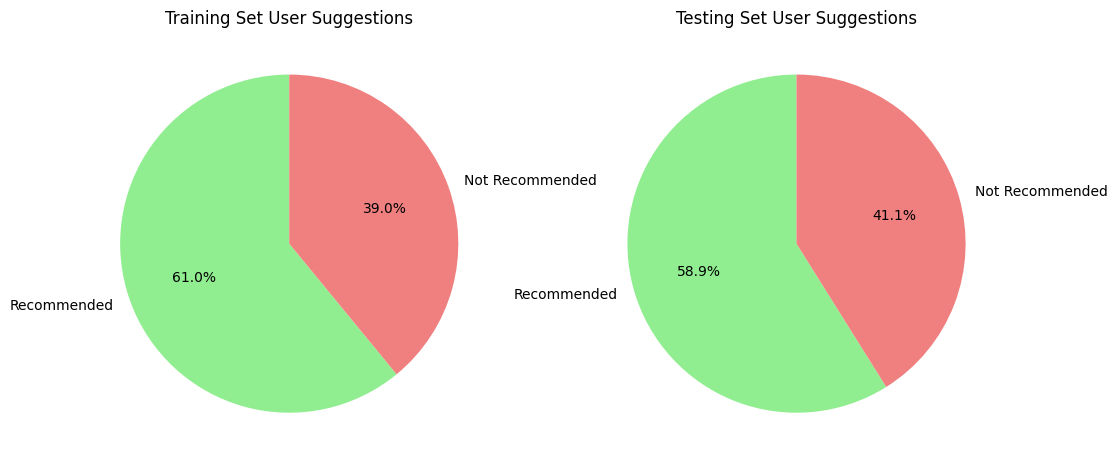

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

X = df['tokenized_reviews_withoutNumber']
y = df['user_suggestion']

# Split the data into training and testing sets
split_ratio = 0.8
split_index = int(len(X) * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Convert tokens into strings for CountVectorizer
X_train_strings = X_train.apply(lambda tokens: ' '.join(map(str, tokens)))
X_test_strings = X_test.apply(lambda tokens: ' '.join(map(str, tokens)))


train_recommendation_counts = y_train.value_counts()
test_recommendation_counts = y_test.value_counts()

# Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for Training Set
axes[0].pie(train_recommendation_counts, labels=['Recommended', 'Not Recommended'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
axes[0].set_title('Training Set User Suggestions')

# Plot for Testing Set
axes[1].pie(test_recommendation_counts, labels=['Recommended', 'Not Recommended'], autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
axes[1].set_title('Testing Set User Suggestions')

plt.show()

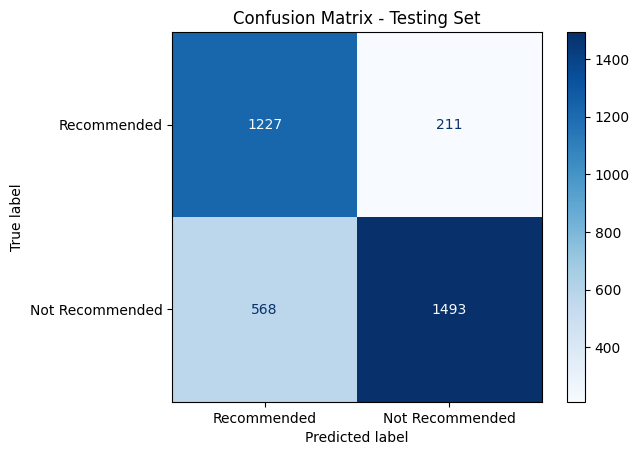

Classification Report - Testing Set:
              precision    recall  f1-score   support

           0       0.88      0.72      0.79      2061
           1       0.68      0.85      0.76      1438

    accuracy                           0.78      3499
   macro avg       0.78      0.79      0.78      3499
weighted avg       0.80      0.78      0.78      3499

Testing Accuracy: 0.78


In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vectorized = vectorizer.fit_transform(X_train_strings)
X_test_vectorized = vectorizer.transform(X_test_strings)

# Train logistic regression using scikit-learn
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test_vectorized)
test_accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=[1, 0])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Recommended', 'Not Recommended'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix - Testing Set')
plt.show()

# Classification Report
print("Classification Report - Testing Set:")
print(classification_rep)

# Display Testing Accuracy
print(f"Testing Accuracy: {test_accuracy:.2f}")


In [72]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.pipeline import make_pipeline

# Create a pipeline with TF-IDF vectorization and logistic regression
pipeline = make_pipeline(TfidfVectorizer(max_features=5000), LogisticRegression())

# Cross-validation
cross_val_scores = cross_val_score(pipeline, X_train_strings, y_train, cv=5, scoring='accuracy')

print("Cross-Validation Scores:")
print(cross_val_scores)
print(f"Mean Accuracy: {cross_val_scores.mean():.2f}")


Cross-Validation Scores:
[0.80314398 0.81529118 0.79421222 0.78385138 0.8113612 ]
Mean Accuracy: 0.80


In [73]:
# Define the parameter grid to search
param_grid = {
    'tfidfvectorizer__max_features': [500, 1000, 2000, 5000],
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]
}

# Create the pipeline
pipeline = make_pipeline(TfidfVectorizer(), LogisticRegression())

# Create GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the training data
grid_search.fit(X_train_strings, y_train)

# Print the best parameters and the corresponding accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'logisticregression__C': 1, 'tfidfvectorizer__max_features': 5000}
Best Accuracy: 0.8015719899964273


C:\Users\golak\AppData\Local\Temp\ipykernel_39292\229922622.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=cross_val_scores, palette="Set3")


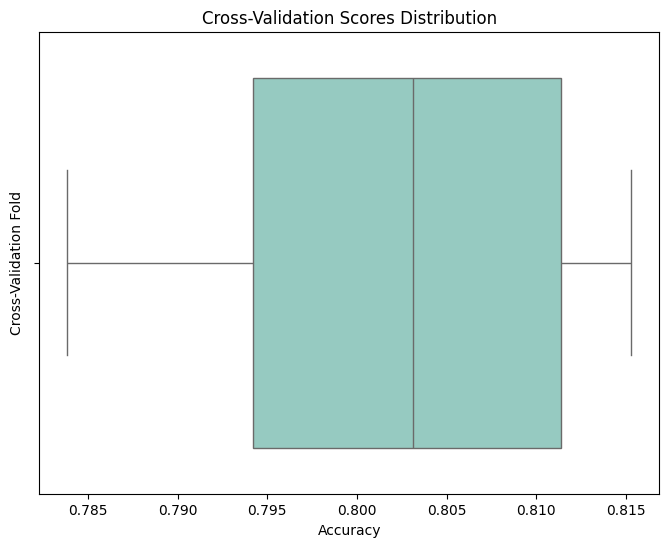

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Create a pipeline with TF-IDF vectorization and logistic regression
pipeline = make_pipeline(TfidfVectorizer(max_features=5000), LogisticRegression())

# Cross-validation
cross_val_scores = cross_val_score(pipeline, X_train_strings, y_train, cv=5, scoring='accuracy')

# Display cross-validation scores
plt.figure(figsize=(8, 6))
sns.boxplot(x=cross_val_scores, palette="Set3")
plt.title('Cross-Validation Scores Distribution')
plt.xlabel('Accuracy')
plt.ylabel('Cross-Validation Fold')
plt.show()
